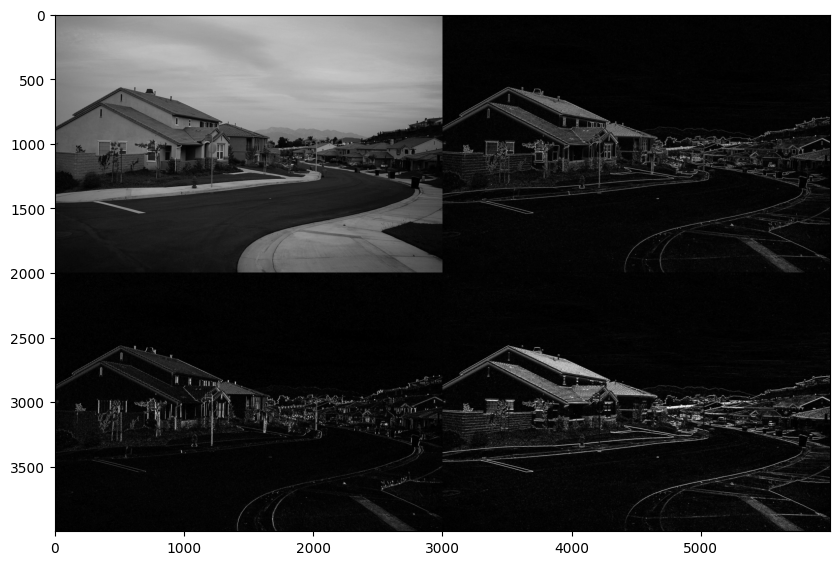

In [1]:

import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import figure as figure
#оператор Собеля 
img1 = cv2.imread("Img1.jpg")
img = cv2.cvtColor(cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY), cv2.COLOR_RGB2BGR) 

#Вычисление градиента Фильтры Собеля позволяют получить более устойчивые к шуму градиенты

x = cv2.Sobel(img,cv2.CV_32F,1,0)  # Прототип Собеля 
y = cv2.Sobel(img,cv2.CV_32F,0,1)  
  
absX = cv2.convertScaleAbs(x)   # Перенести обратно на uint8  
absY = cv2.convertScaleAbs(y)  
  
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)  

stack1 = np.hstack((img, dst))
stack2 = np.hstack((absX, absY))
stack = np.vstack((stack1, stack2))

plt.figure(figsize=(10,10))
plt.imshow(stack)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


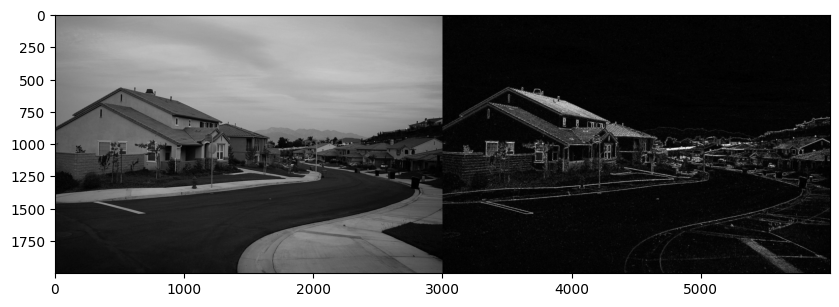

In [2]:
import warnings 
warnings.filterwarnings('ignore')
img = cv2.imread('Img1.jpg')
GRAY_img = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLOR_RGB2BGR)

#Он был основан на том факте, что в краевой области интенсивность пикселей показывает «скачок» или сильное изменение интенсивности.

lap = cv2.Laplacian(GRAY_img, cv2.CV_64F, ksize=3) 
lap = np.uint(np.absolute(lap)) 

stack = np.hstack((GRAY_img, lap))

plt.figure(figsize=(10,10))
plt.imshow(stack)


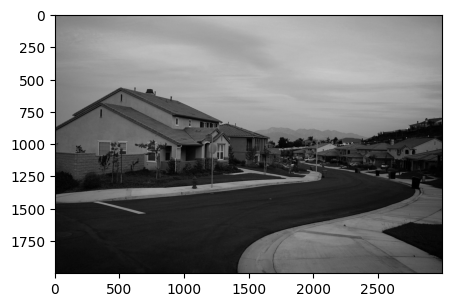

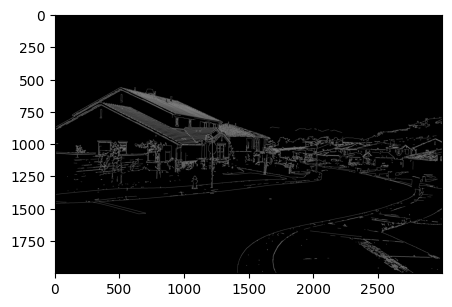

In [3]:
t_lower = 80 # Lower Threshold
t_upper = 150 # Upper threshold
aperture_size = 3 # Aperture size
L2Gradient = True # Boolean
  
#Обнаружение Canny Edge — это алгоритм, состоящий из 4 основных шагов: 
#Уменьшите шум, используя сглаживание по Гауссу.
#Вычислите градиент изображения с помощью фильтра Собеля.
#Примените Non-Max Suppression или NMS, чтобы просто увеличить локальные максимумы.
#Наконец, примените пороговое значение гистерезиса, которое включает два пороговых значения T_upper и T_lower, которые используются в функции Canny(). 
    
canny = cv2.Canny(img, t_lower, t_upper, apertureSize=aperture_size, L2gradient = L2Gradient)

plt.figure(figsize=(5,5))
plt.imshow(GRAY_img)

canny = cv2.cvtColor(canny, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(5,5))
plt.imshow(canny)

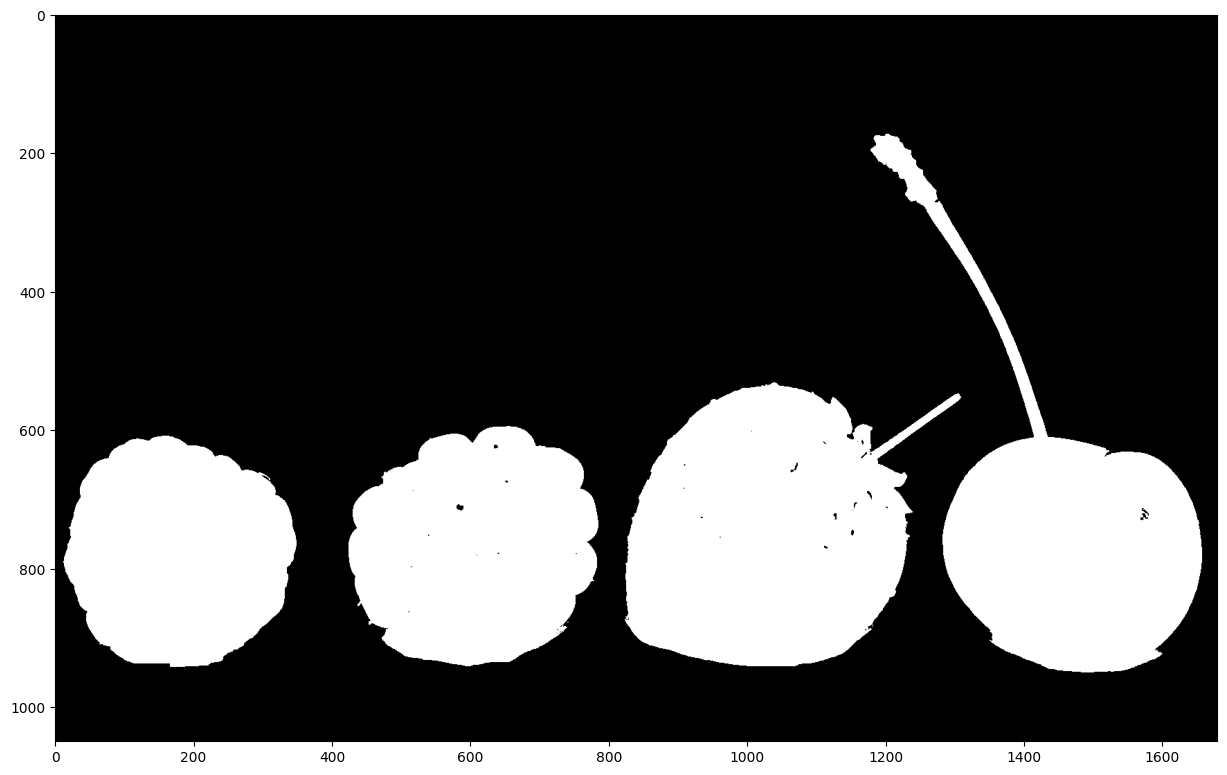

In [4]:
img = cv2.imread('Img2.jpg')

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filterd_image  = cv2.GaussianBlur(imgray, (3, 3), 0)

ret, thresh_img = cv2.threshold(filterd_image, 220, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB))

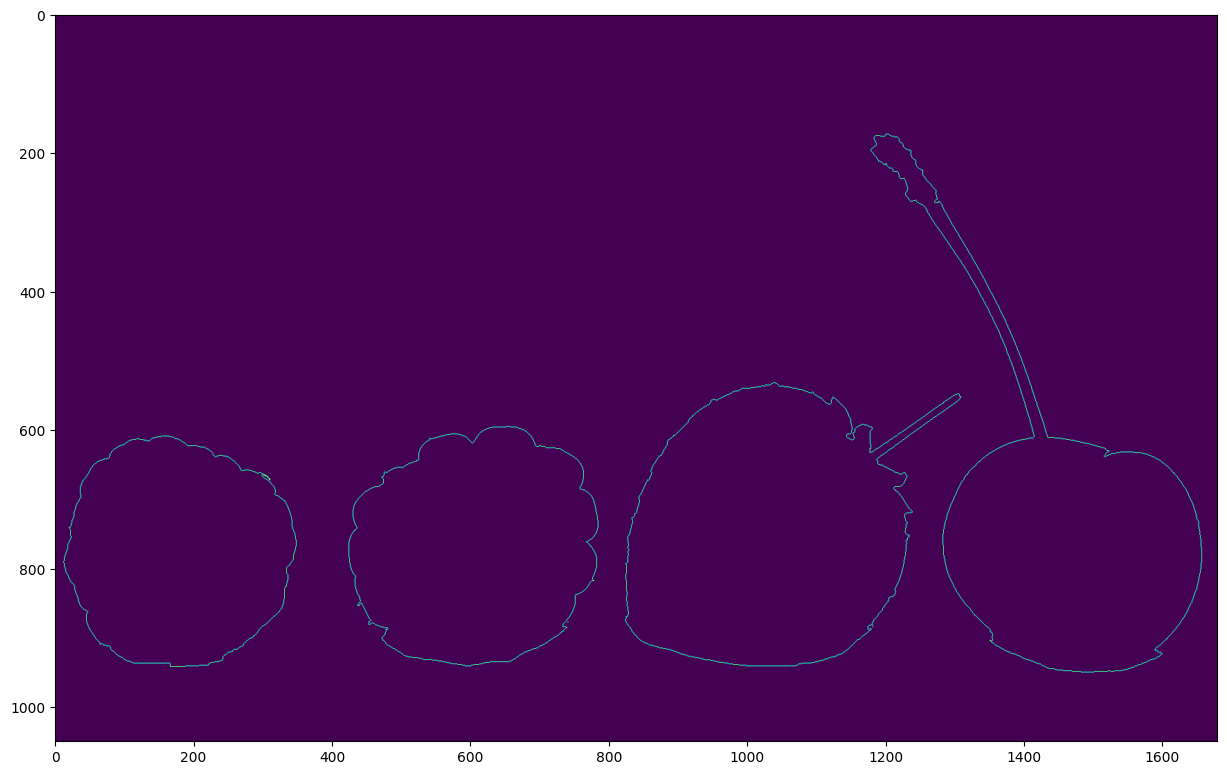

In [5]:
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_contours = np.uint8(np.zeros((img.shape[0],img.shape[1])))
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

plt.figure(figsize=(15,10))
plt.imshow(img_contours)



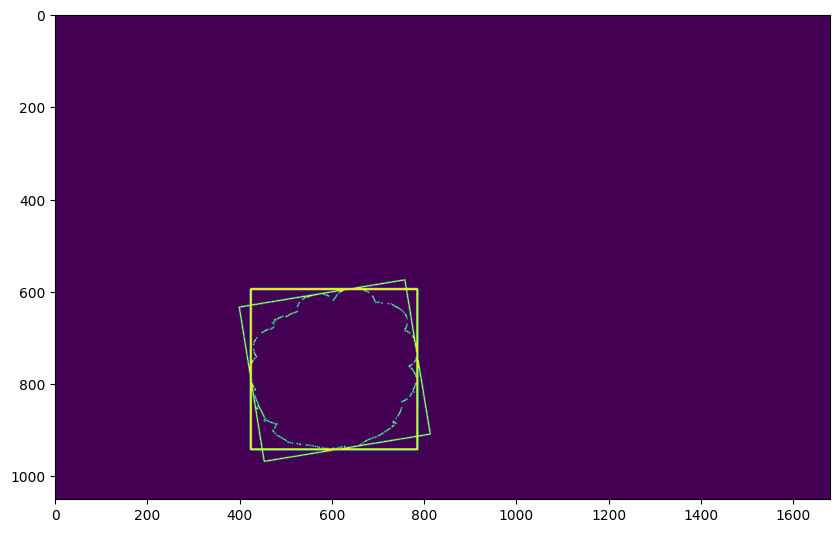

In [17]:
img_contours = np.uint8(np.zeros((img.shape[0], img.shape[1])))
x,y,w,h = cv2.boundingRect(contours[3])

rect = cv2.minAreaRect(contours[3])
box = cv2.boxPoints(rect)
box = np.int0(box)

cv2.rectangle(img_contours,(x,y),(x+w,y+h),(255,255,255),3)
cv2.drawContours(img_contours, [box], -1, (255,100,155), 2)

cv2.drawContours(img_contours, contours[3], -1, (255,255,255), 2)

plt.figure(figsize=(10,10))
plt.imshow(img_contours)

Objects amount:  6


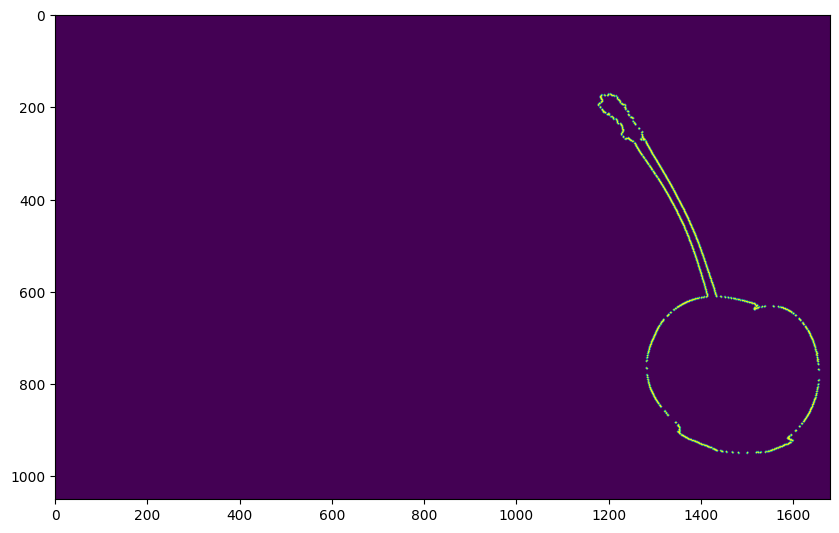

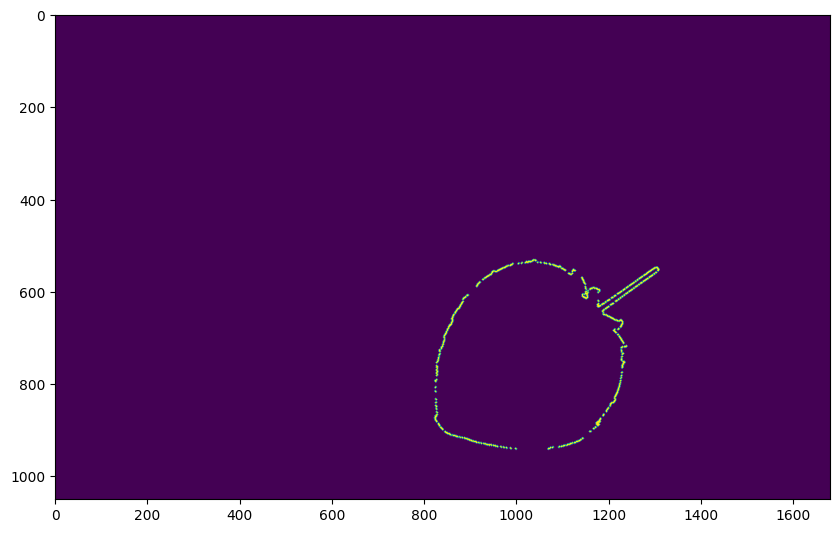

In [7]:
print('Objects amount: ', len(contours))

def print_iterator(it):
    for x in it:
        print(x, end=' ')
    print('')  # for new line

def arc_length(c):
    return cv2.arcLength(c,True)

def area(c):
    return cv2.contourArea(c)

perimeters = list(map(arc_length, contours))
areas = list(map(area, contours))

max_perimeter_index = perimeters.index(max(perimeters))
max_area_index = areas.index(max(areas))

img_contours = np.uint8(np.zeros((img.shape[0], img.shape[1])))
cv2.drawContours(img_contours, contours[max_perimeter_index], -1, (255,100,155), 3)

plt.figure(figsize=(10,10))
plt.imshow(img_contours)

img_contours = np.uint8(np.zeros((img.shape[0], img.shape[1])))
cv2.drawContours(img_contours, contours[max_area_index], -1, (255,100,155), 3)

plt.figure(figsize=(10,10))
plt.imshow(img_contours)

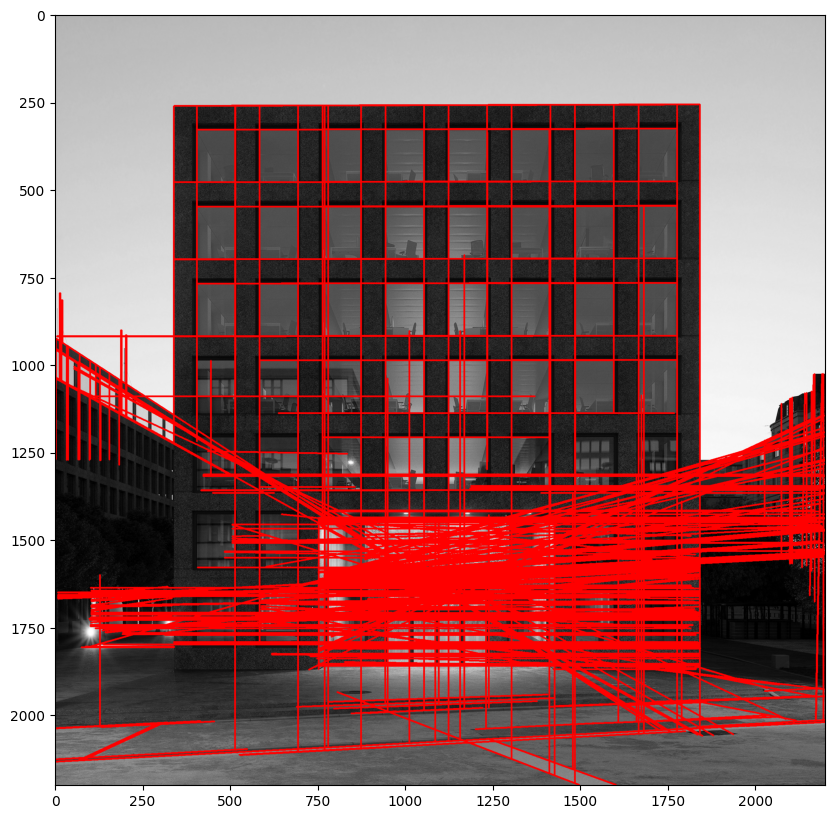

In [8]:
img = cv2.imread('Img3.jpg')
GRAY_img = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLOR_RGB2BGR)
edges = cv2.Canny(GRAY_img, 100, 255, apertureSize = 3)
#HoughLines - определяет квадратные объекты
    #края : Выход детектора края.
    #lines : Вектор для хранения координат начала и конца линии.
    #rho: Параметр разрешения \ров пикселях.
    #theta : Разрешение параметра \тетав радианах.
    #порог : минимальное количество точек пересечения для обнаружения линии. 
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=250)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(GRAY_img, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.figure(figsize=(15,10))
plt.imshow(GRAY_img)

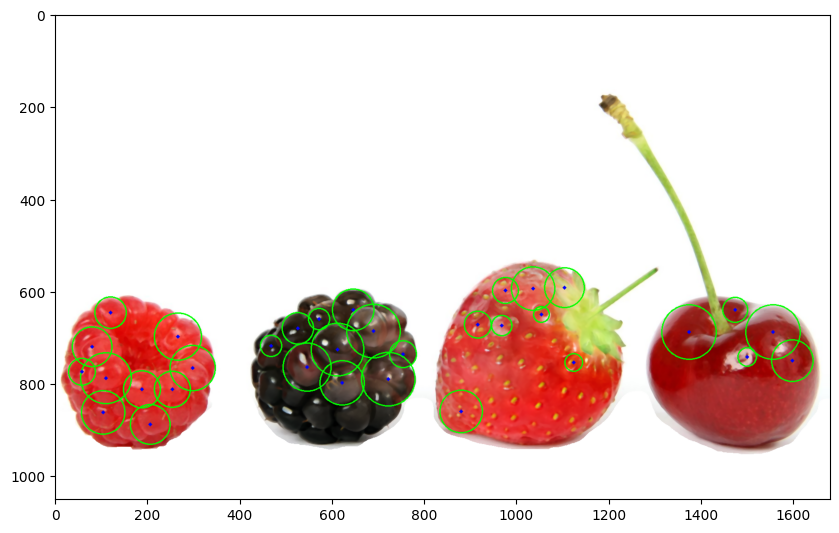

In [18]:
img = cv2.imread('Img2.jpg')
img = cv2.medianBlur(img, 5)

GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


circles = cv2.HoughCircles(GRAY_img, cv2.HOUGH_GRADIENT,1,50,
                            param1=50,param2=30,minRadius=15,maxRadius=60)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(rgb_img,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(rgb_img,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize=(10,10))
plt.imshow(rgb_img)